# Previsão da nota de Matemática do ENEM 2016

## Biblioteca

In [339]:
!pip install category_encoders

In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

import pickle as pk


In [562]:
df = pd.read_csv('https://raw.githubusercontent.com/felipedidier/prevendo-notas-enem2016/master/train.csv',encoding='utf-8-sig')

In [563]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [564]:
df.shape

(13730, 167)

## Análise Exploratória
Foi realizado um primeiro filtro das features existentes na base a partir de análise manual. As features selecionadas serão analisadas mais a fundo para compreensão dos dados.

In [565]:
selected_feat = ['NU_IDADE', 'SG_UF_RESIDENCIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q042', 'Q043', 'Q045', 'Q047', 'Q048']
print(f"{len(selected_feat)} features selecionadas")

56 features selecionadas


In [566]:
df = df[selected_feat]

In [567]:
df.head()

,NU_IDADE,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q042,Q043,Q045,Q047,Q048
0,24,RS,M,0.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,436.3,495.4,581.2,399.4,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,A,A,A,A,A
1,17,CE,F,0.0,3,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,474.5,544.1,599.0,459.8,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A
2,21,CE,F,0.0,3,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A,A,A,A,A
3,25,RJ,F,0.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,E,A,C,C,C,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,C,A,A,D,A
4,28,AM,M,0.0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,A,A,A,A,A


In [568]:
df.shape

(13730, 56)

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NU_IDADE                 13730 non-null  int64  
 1   SG_UF_RESIDENCIA         13730 non-null  object 
 2   TP_SEXO                  13730 non-null  object 
 3   TP_ESTADO_CIVIL          13202 non-null  float64
 4   TP_COR_RACA              13730 non-null  int64  
 5   TP_NACIONALIDADE         13730 non-null  int64  
 6   TP_ST_CONCLUSAO          13730 non-null  int64  
 7   TP_ESCOLA                13730 non-null  int64  
 8   IN_TREINEIRO             13730 non-null  int64  
 9   IN_BAIXA_VISAO           13730 non-null  int64  
 10  IN_CEGUEIRA              13730 non-null  int64  
 11  IN_SURDEZ                13730 non-null  int64  
 12  IN_DEFICIENCIA_AUDITIVA  13730 non-null  int64  
 13  IN_SURDO_CEGUEIRA        13730 non-null  int64  
 14  IN_DEFICIENCIA_FISICA 

In [570]:
df.isna().sum()

NU_IDADE                      0
SG_UF_RESIDENCIA              0
TP_SEXO                       0
TP_ESTADO_CIVIL             528
TP_COR_RACA                   0
TP_NACIONALIDADE              0
TP_ST_CONCLUSAO               0
TP_ESCOLA                     0
IN_TREINEIRO                  0
IN_BAIXA_VISAO                0
IN_CEGUEIRA                   0
IN_SURDEZ                     0
IN_DEFICIENCIA_AUDITIVA       0
IN_SURDO_CEGUEIRA             0
IN_DEFICIENCIA_FISICA         0
IN_DEFICIENCIA_MENTAL         0
IN_DEFICIT_ATENCAO            0
IN_DISLEXIA                   0
IN_DISCALCULIA                0
IN_AUTISMO                    0
IN_VISAO_MONOCULAR            0
IN_OUTRA_DEF                  0
IN_GESTANTE                   0
IN_LACTANTE                   0
IN_IDOSO                      0
TP_PRESENCA_MT                0
NU_NOTA_CN                 3389
NU_NOTA_CH                 3389
NU_NOTA_LC                 3597
NU_NOTA_MT                 3597
Q006                          0
Q007    

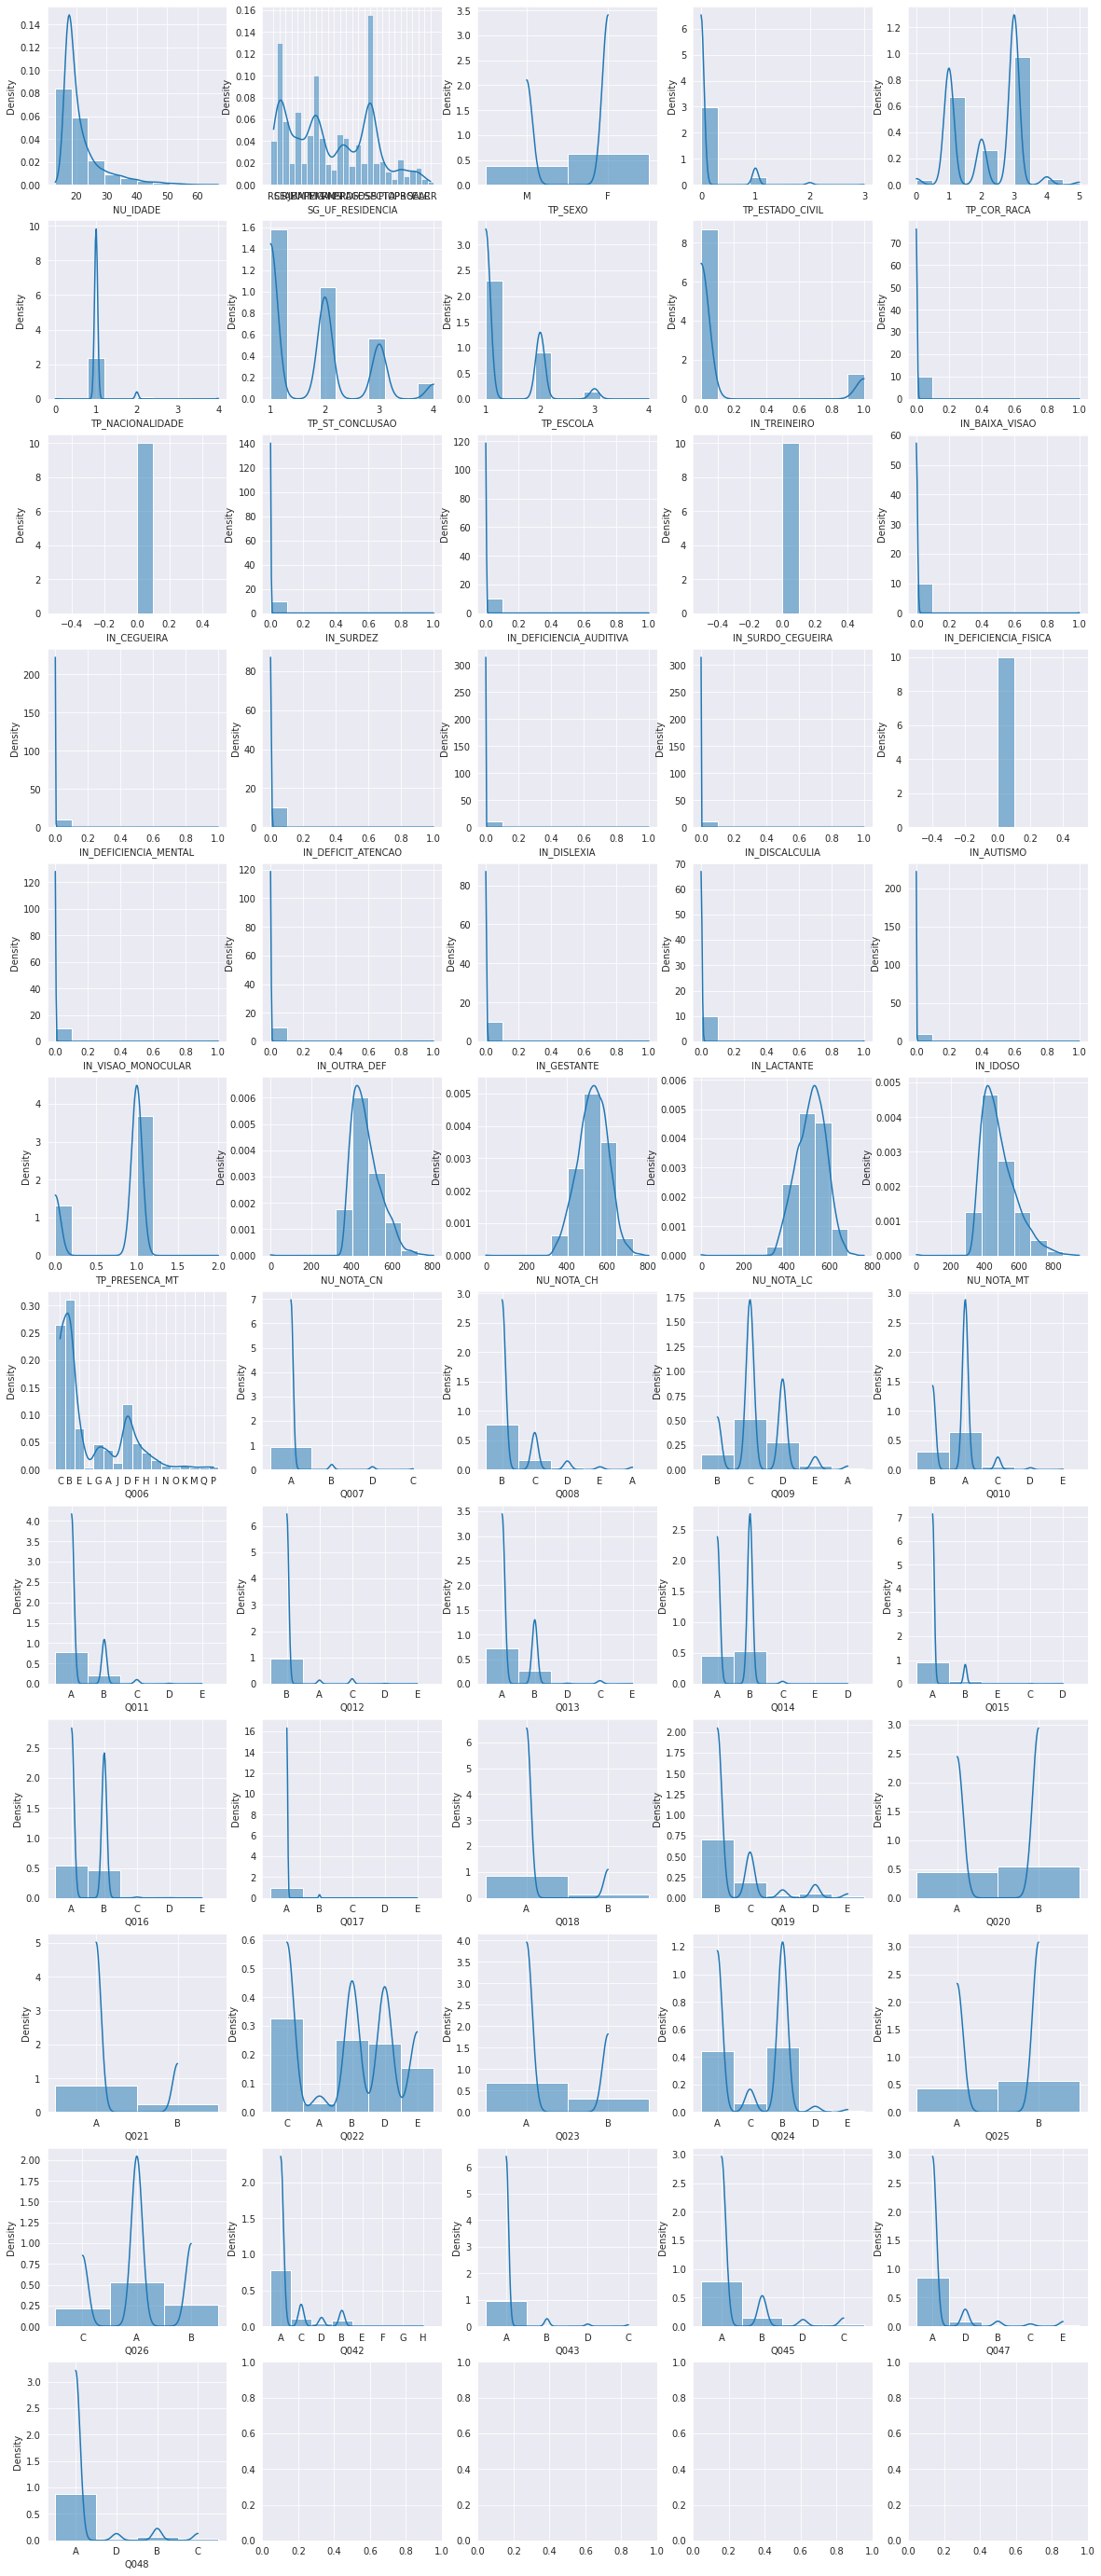

In [426]:
fig, axes = plt.subplots(nrows = 12, ncols = 5)
fig.set_size_inches(20,50)

for i, col in enumerate(selected_feat):
  sns.histplot(df[col], ax = axes[i//5,i%5], bins= 10, stat='density', kde=True)

### Tratamento de NU_NOTA_MT e TP_PRESENCA_MT

A feature TP_PRESENCA_MT indica a presença do participante na prova de matemática ou sua eliminação. Nesse caso, serão mantidos apenas os participantes que estiveram presentes na prova. As parcelas nulas de NU_NOTA_MT são decorrentes dos candidatos que não estiveram presentes na prova ou foram eliminados.

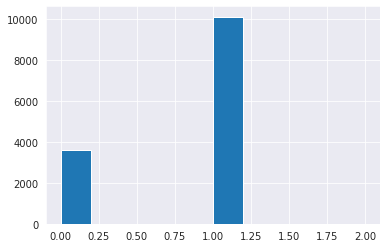

In [571]:
df['TP_PRESENCA_MT'].hist(bins = 10)
plt.show()

In [572]:
df['TP_PRESENCA_MT'].value_counts()

1    10133
0     3592
2        5
Name: TP_PRESENCA_MT, dtype: int64

In [573]:
df = df[df['TP_PRESENCA_MT']==1]

In [574]:
df = df[~df['NU_NOTA_CH'].isna()==True]

In [516]:
df.shape

(10133, 56)

### Tratamento de IN
As variáveis que remetem à uma deficiência física serão aglomeradas em uma mesma variável.

In [576]:
IN = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']

In [577]:
df['IN'] = df[IN].sum(axis=1)

In [578]:
df['IN'].value_counts()

0    10038
1       54
2        5
Name: IN, dtype: int64

In [579]:
df.drop(columns=IN, inplace=True)

In [580]:
df.shape

(10097, 44)

### Tratamento de TP_ESTADO_CIVIL
Como não há justificativa para o não preenchimento desse campo, os dados nulos serão removidos.

In [581]:
df['TP_ESTADO_CIVIL'].value_counts()

0.0    9060
1.0     638
2.0      75
3.0       8
Name: TP_ESTADO_CIVIL, dtype: int64

In [582]:
df = df[df['TP_ESTADO_CIVIL'].isna()==False]

In [583]:
df.shape

(9781, 44)

In [584]:
df_new = df

## Treino e Teste
Separação em treino e teste

In [439]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train, y_train = train.drop(columns="NU_NOTA_MT"), train["NU_NOTA_MT"]
X_test, y_test = test.drop(columns="NU_NOTA_MT"), test["NU_NOTA_MT"]

In [440]:
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (7853, 43)
y_train: (7853,)
X_test: (1964, 43)
y_test: (1964,)


## Transformação de features
Seleção de features categóricas e features numéricas.

In [441]:
train.head()

,NU_IDADE,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q042,Q043,Q045,Q047,Q048,IN
2047,17,TO,M,0.0,3,1,2,2,0,0,0,0,1,380.6,448.6,519.3,543.7,D,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,E,A,B,B,A,A,A,A,A,A,0
2353,17,CE,M,0.0,3,1,2,2,0,0,0,0,1,572.5,652.3,623.1,574.5,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,A,B,A,B,A,A,A,A,A,A,A,0
10351,18,CE,F,0.0,3,1,1,1,0,0,0,0,1,566.7,578.1,549.3,537.2,F,A,D,D,B,A,B,B,B,A,B,A,A,D,A,B,C,B,C,B,B,C,A,A,A,D,0
10345,23,SP,F,0.0,3,1,1,1,0,0,0,0,1,393.9,458.4,526.0,517.0,E,A,A,C,A,A,B,A,A,A,B,A,A,B,A,A,C,B,A,A,C,A,A,A,A,A,0
5036,28,BA,F,0.0,0,1,2,2,0,0,0,0,1,464.0,545.9,519.4,518.9,B,A,B,C,A,A,B,A,A,A,A,B,A,B,B,A,B,A,A,A,A,A,A,C,A,A,0


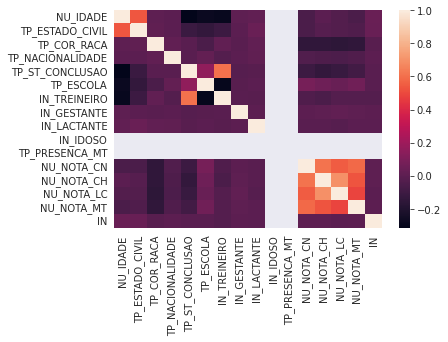

In [442]:
sns.heatmap(train.corr())

#### Agrupamento de features
As features serão agrupadas em 03 grupos:

1.   Variáveis numéricas: a transformação dessas variáveis será realizada com Z-scale
2.   Variáveis categóricas 01: a transformação dessas variáveis será realizada com Ordinal Enconder
3.   Variáveis categóricas 02: a transformação dessas variáveis será realizada com OneHot Enconder.



In [492]:
feat_num = ['NU_IDADE', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']
feat_cat1 = ['TP_SEXO', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q042', 'Q043', 'Q045', 'Q047', 'Q048']
feat_cat2 = ['SG_UF_RESIDENCIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO']

#### Variáveis numéricas
Para as variáveis numéricas, será utilizada a transformação Z-scale.

In [444]:
z_score = StandardScaler()
def std_z_scale(df,col):
  df[col] = z_score.fit_transform(df[[col]])

In [445]:
for col in feat_num:
  std_z_scale(train, col)
  std_z_scale(test, col)

In [446]:
train[feat_num].head()

,NU_IDADE,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
2047,-0.551043,0.610741,-1.324504,-1.116802,0.033742
2353,-0.551043,0.921211,1.380231,1.654888,1.554159
10351,-0.392457,0.545220,1.298483,0.645269,0.473169
10345,0.400474,0.341600,-1.137047,-0.983456,0.131881
5036,1.193404,0.360753,-0.149022,0.207132,0.035207


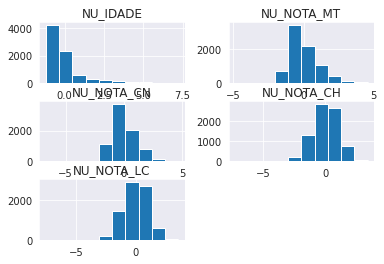

In [447]:
train[feat_num].hist()
plt.show()

In [448]:
train.shape

(7853, 44)

#### Variáveis categóricas
Devido o formato dos dados, serão adotados modelos de transformações distintos para atender cada variável. Serão utilizadas as transformações OneHot Encoder e Label Encoder.

In [449]:
#Ordinal Encoder
maplist = [{'mapping': {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17}}]

oe = OrdinalEncoder()

def ordinal_encoder(df):
  df[feat_cat1] = oe.fit_transform(df[feat_cat1])

In [450]:
ordinal_encoder(train)
ordinal_encoder(test)

In [451]:
train.shape

(7853, 44)

In [452]:
train[feat_cat1].head()

,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q042,Q043,Q045,Q047,Q048
2047,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2353,2,1,1,2,1,1,1,2,2,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1
10351,3,1,2,2,2,1,1,1,2,1,2,1,1,2,1,2,3,2,2,1,2,2,1,1,1,2
10345,4,1,3,1,1,1,1,2,1,1,2,1,1,1,1,1,3,2,3,2,3,1,1,1,1,1
5036,2,1,1,1,1,1,1,2,1,1,1,2,1,1,2,1,2,1,3,2,1,1,1,2,1,1


In [453]:
#OneHot Encoder
one_hot = OneHotEncoder()

for col in feat_cat2:
  temp = pd.DataFrame(one_hot.fit_transform(train[[col]]).toarray(),columns=one_hot.get_feature_names([col]))
  train = train.drop(columns=col).join(temp)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [454]:
for col in feat_cat2:
  temp = pd.DataFrame(one_hot.fit_transform(test[[col]]).toarray(),columns=one_hot.get_feature_names([col]))
  test = test.drop(columns=col).join(temp)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [455]:
train['TP_SEXO'] = train['TP_SEXO'].str.replace("M","0").str.replace("F","1").astype(float)
test['TP_SEXO'] = test['TP_SEXO'].str.replace("M","0").str.replace("F","1").astype(float)

In [456]:
train.head()

,NU_IDADE,TP_SEXO,TP_ESCOLA,IN_TREINEIRO,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q042,Q043,Q045,Q047,Q048,IN,SG_UF_RESIDENCIA_AC,...,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_ESTADO_CIVIL_0.0,TP_ESTADO_CIVIL_1.0,TP_ESTADO_CIVIL_2.0,TP_ESTADO_CIVIL_3.0,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4
2047,-0.551043,0.0,2,0,0,0,0,1,-1.324504,-1.116802,0.033742,0.610741,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2353,-0.551043,0.0,2,0,0,0,0,1,1.380231,1.654888,1.554159,0.921211,2,1,1,2,1,1,1,2,2,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10351,-0.392457,1.0,1,0,0,0,0,1,1.298483,0.645269,0.473169,0.545220,3,1,2,2,2,1,1,1,2,1,2,1,1,2,1,2,3,2,2,1,2,2,1,1,1,2,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10345,0.400474,1.0,1,0,0,0,0,1,-1.137047,-0.983456,0.131881,0.341600,4,1,3,1,1,1,1,2,1,1,2,1,1,1,1,1,3,2,3,2,3,1,1,1,1,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5036,1.193404,1.0,2,0,0,0,0,1,-0.149022,0.207132,0.035207,0.360753,2,1,1,1,1,1,1,2,1,1,1,2,1,1,2,1,2,1,3,2,1,1,1,2,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [457]:
train.shape

(7853, 85)

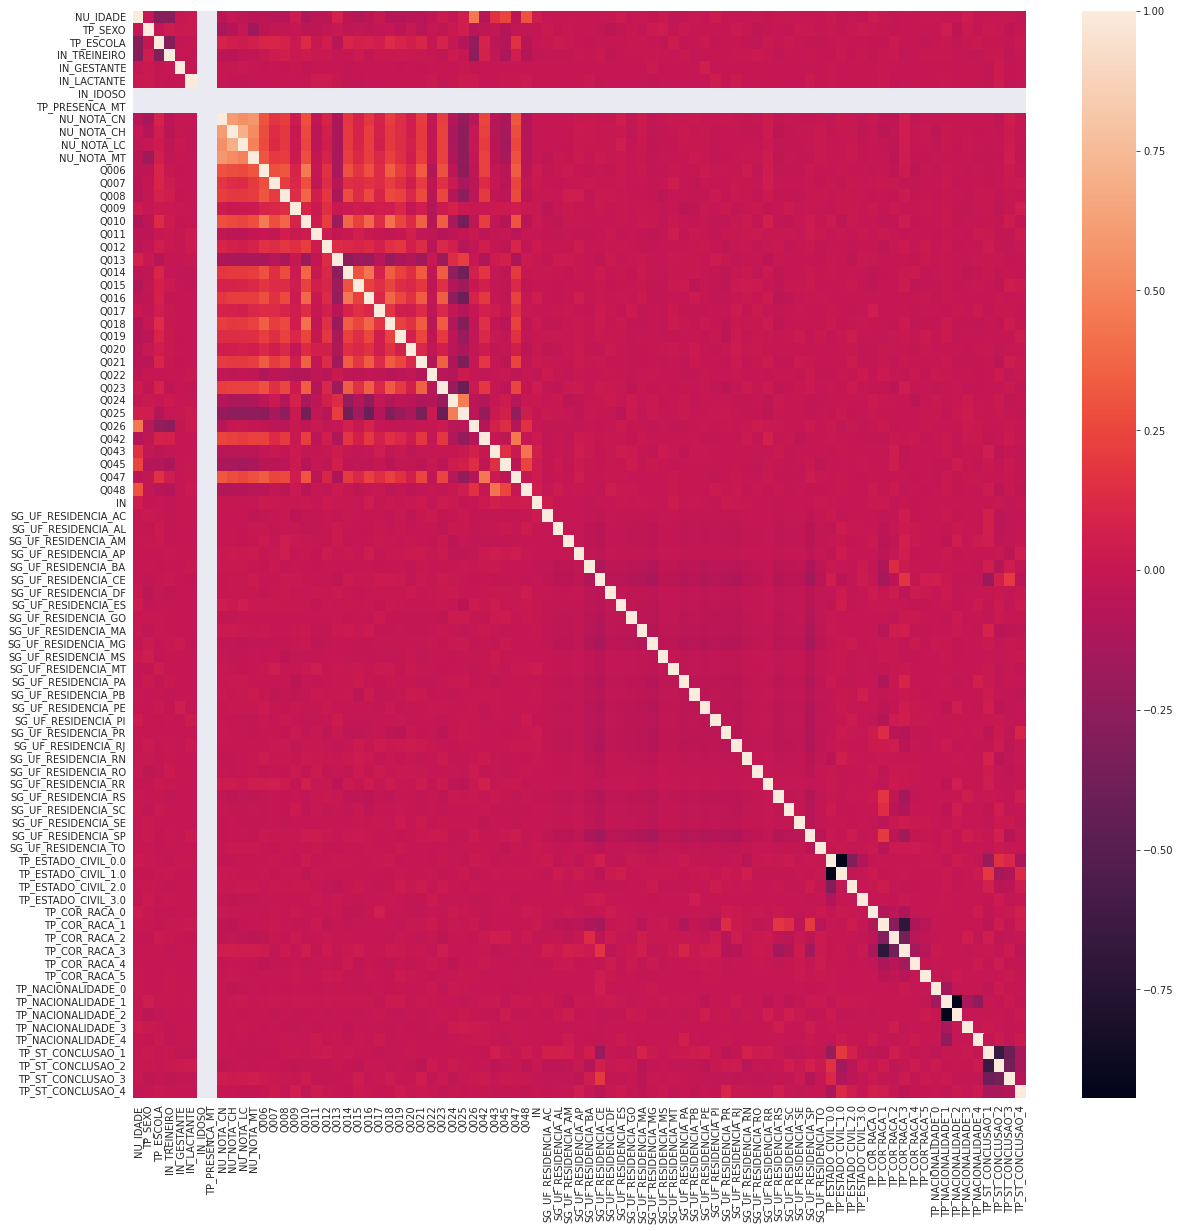

In [458]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr())

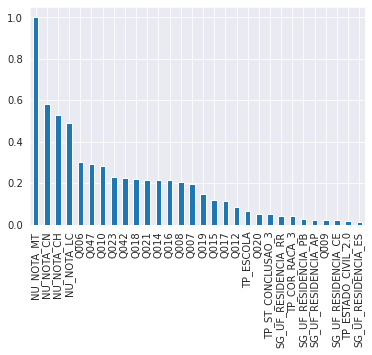

In [459]:
train.corr()['NU_NOTA_MT'].sort_values(ascending=False).head(30).plot(kind='bar')

In [460]:
train.isna().sum()

NU_IDADE                 0
TP_SEXO                  0
TP_ESCOLA                0
IN_TREINEIRO             0
IN_GESTANTE              0
                      ... 
TP_NACIONALIDADE_4    3358
TP_ST_CONCLUSAO_1     3358
TP_ST_CONCLUSAO_2     3358
TP_ST_CONCLUSAO_3     3358
TP_ST_CONCLUSAO_4     3358
Length: 85, dtype: int64

In [461]:
for col in train.columns:
  train[col].fillna(train[col].median(), inplace=True)
  test[col].fillna(test[col].median(), inplace=True)

## Selecionando as melhores features

1º passo: Saber quantas features você irá selecionar

In [ ]:
df_features = train.drop(columns='NU_NOTA_MT')
df_target = train['NU_NOTA_MT']

In [ ]:
# Selecionando todas as features para retornar o score
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(df_features,df_target)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6 7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all')

In [ ]:
# como o resultado é em array, converter para dataframe
scores = pd.DataFrame(data=fs.scores_, columns=['score'])
scores.sort_values(by='score', ascending=False, inplace=True)
scores.reset_index(inplace=True)
scores

,index,score
0,4,2.108452
1,9,1.645844
2,8,1.581406
3,32,1.529321
4,12,1.492582
...,...,...
76,71,0.813219
77,30,0.812082
78,65,0.626628
79,6,NaN


In [ ]:
scores = scores.sort_values(by='index')
scores['FEATURE'] = train.drop(columns='NU_NOTA_MT').columns
scores.sort_values(by='score', ascending=False, inplace=True)

In [ ]:
scores

,index,score,FEATURE
0,4,2.108452,IN_GESTANTE
1,9,1.645844,Q007
2,8,1.581406,Q006
3,32,1.529321,Q047
4,12,1.492582,Q010
...,...,...,...
76,71,0.813219,TP_COR_RACA_5
77,30,0.812082,Q043
78,65,0.626628,TP_ESTADO_CIVIL_3.0
79,6,NaN,IN_IDOSO


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


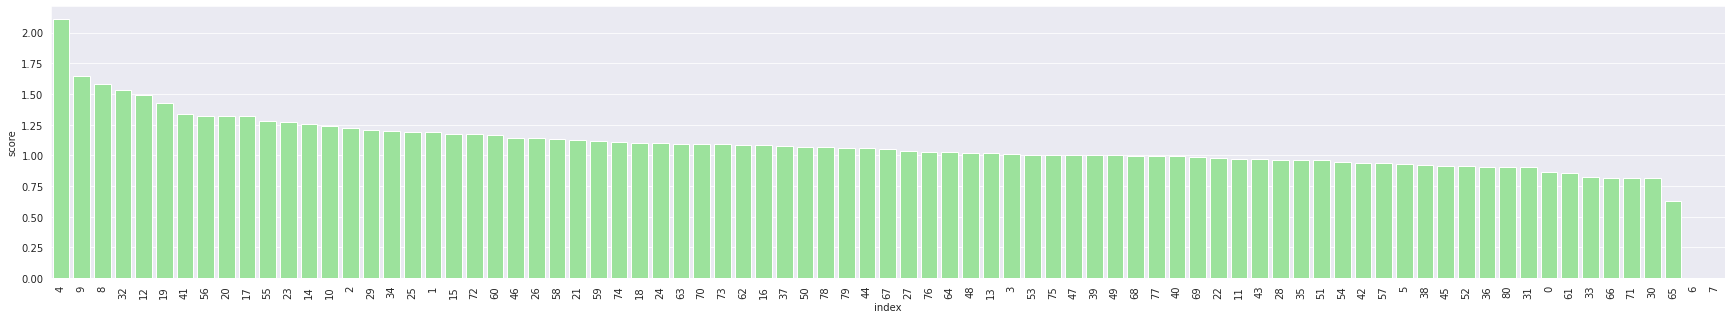

In [ ]:
plt.figure(figsize=(30,5))
sns.barplot(scores['index'], scores.score,  order=scores['index'], color='lightgreen')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Aqui fica definida a quantidade de features que seguem na análise
scores_select = scores[scores['index'].isin(np.where(fs.pvalues_>0.4)[0])]
score_qttd = scores_select.shape[0]
print(f"Foram selecionadas {score_qttd} features de {train.shape[1]}.")

Foram selecionadas 33 features de 82.


In [ ]:
# Definida a quantidade de features, o SelectKBest pode ser rodado novamente
fs = SelectKBest(score_func=f_classif, k=score_qttd)
fs.fit(df_features,df_target)

cols = fs.get_support(indices=True)
df_features_new = df_features.iloc[:,cols]

train_fs = pd.DataFrame(fs.transform(df_features))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6 7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
select_columns = []
for col in df_features_new.columns:
  select_columns.append(col)

In [ ]:
train = train[select_columns]

In [ ]:
train.shape

(7853, 33)

In [ ]:
train.head()

,TP_SEXO,TP_ESCOLA,IN_GESTANTE,Q006,Q007,Q008,Q010,Q012,Q013,Q015,Q016,Q017,Q018,Q019,Q021,Q022,Q023,Q024,Q042,Q047,IN,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,TP_ESTADO_CIVIL_1.0,TP_COR_RACA_4,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2
2047,0.0,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2353,0.0,2,0,2,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10351,1.0,1,0,3,1,2,2,1,1,1,2,1,1,2,2,3,2,2,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10345,1.0,1,0,4,1,3,1,1,2,1,2,1,1,1,1,3,2,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5036,1.0,2,0,2,1,1,1,1,2,1,1,2,1,1,1,2,1,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
train.drop(columns = ['IN_GESTANTE', 'SG_UF_RESIDENCIA_DF', 'SG_UF_RESIDENCIA_MS', 'SG_UF_RESIDENCIA_RO', 'SG_UF_RESIDENCIA_RR', 'SG_UF_RESIDENCIA_SC', 'SG_UF_RESIDENCIA_SE', 'SG_UF_RESIDENCIA_SP', 'TP_NACIONALIDADE_1', 'TP_NACIONALIDADE_2', 'TP_ESTADO_CIVIL_1.0', 'TP_COR_RACA_4'], inplace = True)

In [ ]:
train.head()

,TP_SEXO,TP_ESCOLA,Q006,Q007,Q008,Q010,Q012,Q013,Q015,Q016,Q017,Q018,Q019,Q021,Q022,Q023,Q024,Q042,Q047,IN,TP_NACIONALIDADE_0
2047,0.0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.0
2353,0.0,2,2,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,0,0.0
10351,1.0,1,3,1,2,2,1,1,1,2,1,1,2,2,3,2,2,2,1,0,0.0
10345,1.0,1,4,1,3,1,1,2,1,2,1,1,1,1,3,2,3,1,1,0,0.0
5036,1.0,2,2,1,1,1,1,2,1,1,2,1,1,1,2,1,3,1,1,0,0.0


In [ ]:
feat_final = []
for col in train.columns:
  feat_final.append(col)

In [ ]:
test = test[feat_final]

## Machine Learning Model

In [466]:
rfr = RandomForestRegressor()
print(rfr)

parameters = {
    "n_estimators":[10, 50, 100, 250],
    "max_depth":[8, 12, 16, None]
}

cv = GridSearchCV(rfr,parameters,cv=5)

RandomForestRegressor()


In [467]:
cv.fit(train.drop(columns='NU_NOTA_MT'),y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 12, 16, None],
                         'n_estimators': [10, 50, 100, 250]})

In [464]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [468]:
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 250}


0.442 + or -0.006 for the {'max_depth': 8, 'n_estimators': 10}
0.453 + or -0.01 for the {'max_depth': 8, 'n_estimators': 50}
0.456 + or -0.009 for the {'max_depth': 8, 'n_estimators': 100}
0.456 + or -0.009 for the {'max_depth': 8, 'n_estimators': 250}
0.422 + or -0.014 for the {'max_depth': 12, 'n_estimators': 10}
0.449 + or -0.011 for the {'max_depth': 12, 'n_estimators': 50}
0.453 + or -0.01 for the {'max_depth': 12, 'n_estimators': 100}
0.455 + or -0.009 for the {'max_depth': 12, 'n_estimators': 250}
0.411 + or -0.016 for the {'max_depth': 16, 'n_estimators': 10}
0.441 + or -0.01 for the {'max_depth': 16, 'n_estimators': 50}
0.447 + or -0.012 for the {'max_depth': 16, 'n_estimators': 100}
0.45 + or -0.011 for the {'max_depth': 16, 'n_estimators': 250}
0.399 + or -0.005 for the {'max_depth': None, 'n_estimators': 10}
0.435 + or -0.011 for the {'max_depth': None, 'n_estimators': 50}
0.439 + or -0.012 for the {'max_depth': N

In [469]:
y_pred = cv.predict(test.drop(columns='NU_NOTA_MT'))

In [476]:
from sklearn.metrics import mean_squared_error as MSE

rmse_test = MSE(y_test, y_pred)**(1/2)

In [477]:
print(rmse_test)

73.66799706650846


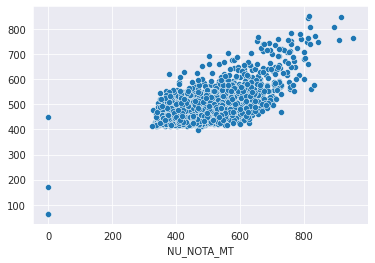

In [470]:
sns.scatterplot(x=y_test, y=y_pred)

plt.show()

## Criando Pipeline

In [585]:
target = ['NU_NOTA_MT']

In [559]:
df_new = df

In [586]:
df_new.head()       

,NU_IDADE,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q042,Q043,Q045,Q047,Q048,IN
0,24,RS,M,0.0,1,1,1,1,0,0,0,0,1,436.3,495.4,581.2,399.4,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,A,A,A,A,A,0
1,17,CE,F,0.0,3,1,2,2,0,0,0,0,1,474.5,544.1,599.0,459.8,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,0
5,18,BA,F,0.0,1,1,1,1,0,0,0,0,1,439.7,583.2,410.9,364.5,C,A,C,D,B,B,B,B,A,A,B,A,A,B,B,B,E,A,B,B,A,A,A,A,A,A,0
6,18,MT,F,0.0,3,1,2,2,0,0,0,0,1,420.1,604.2,484.5,529.2,C,A,C,D,C,A,B,A,B,A,B,A,B,A,A,A,D,A,B,B,C,A,A,B,A,A,0
7,18,RS,F,0.0,1,1,1,1,0,0,0,0,1,619.6,625.8,611.2,566.7,L,A,C,D,B,A,B,B,B,A,B,A,B,C,B,B,D,B,B,B,A,C,A,A,D,A,0


In [587]:
train, test = train_test_split(df_new, test_size=0.2, random_state=42)
X_train, y_train = train.drop(columns='NU_NOTA_MT'), train[target]
X_test, y_test = test.drop(columns='NU_NOTA_MT'), test[target]

In [588]:
z_score = StandardScaler()
oe = OrdinalEncoder()
one_hot = OneHotEncoder()

In [589]:
feat_num = ['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']
feat_cat1 = ['TP_SEXO', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q042', 'Q043', 'Q045', 'Q047', 'Q048', 'IN']
feat_cat2 = ['SG_UF_RESIDENCIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO']

In [590]:
preprocess = ColumnTransformer(
                    [   
                        ('StdTransf', z_score, feat_num),
                        ('Ordinal', oe, feat_cat1),
                        ('OneHot', one_hot, feat_cat2),
                        
                    ], remainder='passthrough')

In [591]:
dt_tf = preprocess.fit_transform(X_train, y_train)

In [592]:
pd.DataFrame(data = dt_tf).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
0,-0.550652,-0.436235,0.399796,0.611984,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
1,-0.550652,-0.067091,-0.083269,-0.366792,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.097018,1.031917,1.001581,0.230699,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.388735,0.259944,0.702735,0.708400,2.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
4,-0.064899,-0.700109,0.135066,0.306664,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


In [593]:
model = TransformedTargetRegressor(regressor=RandomForestRegressor(n_estimators=250, bootstrap=True, criterion='mse', max_depth=8, max_features='auto', random_state=42), transformer = z_score)

In [594]:
pipe = Pipeline([("pre", preprocess), ("tree", model)])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StdTransf', StandardScaler(),
                                                  ['NU_IDADE', 'NU_NOTA_CN',
                                                   'NU_NOTA_CH',
                                                   'NU_NOTA_LC']),
                                                 ('Ordinal', OrdinalEncoder(),
                                                  ['TP_SEXO', 'Q006', 'Q007',
                                                   'Q008', 'Q009', 'Q010',
                                                   'Q011', 'Q012', 'Q013',
                                                   'Q014', 'Q015', 'Q016',
                                                   'Q017', 'Q018', 'Q019',
                                                   'Q020', 'Q021', 'Q022',
                                                   'Q023', 'Q024', 'Q025',
                   

In [595]:
## Test
pred_value = pipe.predict(X_test)

mse_dt = mean_squared_error(y_test, pred_value)

rmse_dt = mse_dt ** (1/2)

print("Test set MSE of dt: {:.3f}".format(mse_dt))
print("Test set RMSE of dt: {:.3f}".format(rmse_dt))
print(f"Test set R2 of dt {r2_score(y_test, pred_value):.3f}")

Test set MSE of dt: 5308.096
Test set RMSE of dt: 72.857
Test set R2 of dt 0.466


### Gerando arquivo .pkl

In [597]:
pk.dump(pipe, open('model_rfr.pkl', 'wb'))